In [1]:
import pandas as pd
import numpy as np
import yaml

#para la extracción de datos
import requests  # Requests permite hacer peticiones HTTP para interactuar con APIs y sitios web.
import selenium
from selenium import webdriver  # WebDriver permite controlar un navegador de forma automatizada.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait  # WebDriverWait permite esperar hasta que una condición específica se cumpla.
from selenium.webdriver.support import expected_conditions as EC  # EC ayuda a definir condiciones para WebDriverWait.
from selenium.common.exceptions import NoSuchElementException  # Excepciones comunes de Selenium que nos podemos encontrar.
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup  # BeautifulSoup permite parsear HTML y extraer información del contenido de las páginas web.
from time import sleep


import seaborn as sns
import matplotlib.pyplot as plt
import sys 
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f
import soporte_extraccion as q
pd.set_option('display.max_columns', None)

In [3]:
datos_ef=pd.read_csv("../datos/ECEPOVvivienda_2021.csv", sep="\t")

ruta_archivo = '../datos/mapeos.xlsx'
excel = pd.ExcelFile(ruta_archivo)

In [4]:
datos_ef.columns=datos_ef.columns.str.lower()

In [5]:
datos_ef.shape

(172444, 88)

In [6]:
datos_ef.head()

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,internet,intfijabancha,intmovbancha,intbestrecha,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,vehiculo,nvehiculos,vehielectr,vehihibri,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,enerenov,ersolar,erfotov,erotro,nviviendp
0,1,1,0,1,63.480315,6,2021,1,6,1,3,03,1,,1,1,1,6,1,6,6,,,,1,1,2,2,1,1,1,1,1,3,0,0,5,1,1.0,6,6,1,1,1,1,6,1,1,3,3,6,6,6,6,6,6,6,1,1,1,1,1,6,6,,,,,4,2,4,3,1,9,6,2,6,1,8,6,6,1,1,6,,,,4
1,2,1,0,1,53.005532,7,2021,6,1,2,2,,3,1,1,1,1,6,6,6,1,1,1,,1,1,1,2,1,1,1,3,1,3,2,0,8,1,1.0,6,6,1,1,1,1,1,6,1,3,1,6,1,6,6,6,1,6,1,1,1,1,1,6,6,,,,,3,1,1,2,1,9,9,2,6,1,2,1,1,1,1,6,,,,1
2,3,1,0,1,61.559149,6,2021,1,1,4,3,08,3,3,1,1,1,6,6,6,1,1,,,1,1,1,1,1,1,1,4,1,4,2,0,7,1,3.0,6,6,1,1,1,6,1,1,1,3,3,6,6,6,6,6,6,6,1,1,1,1,1,6,6,,,,,6,1,1,2,1,10,9,1,6,1,1,1,6,1,1,6,,,,1
3,4,1,0,1,73.385525,12,2021,1,6,1,1,,3,3,1,1,1,6,6,6,1,1,1,,1,1,1,2,1,1,1,1,2,3,0,0,4,1,1.0,6,6,1,1,6,1,1,1,6,3,3,6,6,6,1,6,6,6,1,1,1,1,1,6,6,,,,,5,2,3,3,0,5,7,2,6,6,,6,6,1,1,6,,,,2
4,5,1,0,1,59.495080,5,2021,1,1,4,2,,3,1,1,1,1,6,6,6,1,,1,,1,1,2,2,1,1,1,3,1,3,1,0,6,1,2.0,6,6,1,1,1,1,1,1,1,3,3,6,6,6,6,6,6,6,1,1,1,1,1,6,6,,,,,7,1,1,3,1,10,9,2,6,1,1,1,6,1,1,6,,,,1


[Antes de nada hice un análisis de las correlaciones](2\_carga\_y\_EDA.ipynb#análisis-de-correlaciones)



Tengo que investigar que son los huecos vacios porque no se pueden rellenar por nulos sino que hay que ver cada caso en concreto por ejemplo el caso de ersolar o erfotov que solo tiene valores que valen 1 en caso de que tenga y vacío si no tiene

In [7]:
datos_ef["nvehiculos"].isna().sum()

np.int64(33896)

Convierto los Nan a 0 porque corresponden justo a los que no tienen vehiculo

In [8]:
datos_ef["nvehiculos"].fillna(0, inplace=True)

In [9]:
datos_ef["nvehiculos"].isna().sum()

np.int64(0)

In [ ]:
datos_ef["ersolar"].value_counts()

ersolar
     165562
1      6882
Name: count, dtype: int64

In [11]:
datos_ef["erfotov"].value_counts()

erfotov
     170408
1      2036
Name: count, dtype: int64

Me doy cuenta de que no hay nulos en municipios

In [ ]:
datos_ef[datos_ef["idq_mun"]==99999]     #los que no saben y no contestan (nulos)

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,internet,intfijabancha,intmovbancha,intbestrecha,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,vehiculo,nvehiculos,vehielectr,vehihibri,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,enerenov,ersolar,erfotov,erotro,nviviendp


Me doy cuenta de que hay 67340 con menos de 50.000 habitantes

In [15]:
# datos_ef[datos_ef["idq_mun"]==00000]    #los que son menos de 50k habitantes

In [16]:
len((datos_ef["idq_mun"].unique()))

152

In [17]:
categoricas=datos_ef.select_dtypes("O")

In [18]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172444 entries, 0 to 172443
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   pagovi         172444 non-null  object
 1   tipocombcale   172444 non-null  object
 2   intfijabancha  172444 non-null  object
 3   intmovbancha   172444 non-null  object
 4   intbestrecha   172444 non-null  object
 5   vehielectr     172444 non-null  object
 6   vehihibri      172444 non-null  object
 7   lugsegunresi   172444 non-null  object
 8   otraccaa       172444 non-null  object
 9   otropais       172444 non-null  object
 10  diasusa        172444 non-null  object
 11  nplazasgar     172444 non-null  object
 12  tipoevacuares  172444 non-null  object
 13  ersolar        172444 non-null  object
 14  erfotov        172444 non-null  object
 15  erotro         172444 non-null  object
dtypes: object(16)
memory usage: 21.1+ MB


### *Aquí gestionando los vacíos de cada columna*  
- Porque me he dado cuenta de que esos vacíos pueden ser:  
    - nulos
    - categorías faltantes (caso de erfotov)

OBSERVO LAS NUMÉRICAS 

In [19]:
# columnas_num=datos_ef.select_dtypes("number").columns
# for num in columnas_num:
#     print(f"Total_{num}: {datos_ef[num].value_counts().sum()} \n")
#     print(datos_ef[num].value_counts( dropna=False).sort_index())
#     print("oooooooooooooooooooooooooooooooooooooooooooooooooo")
#     print(datos_ef[num].value_counts(normalize=True, dropna=False).sort_index())
#     print("--------------------------------------------------")


#Ya los he investigado pero lo quito para que no quede la cascada

In [20]:
datos_ef["vehiculo"].value_counts()

vehiculo
1    138548
6     33896
Name: count, dtype: int64

In [21]:
datos_ef["segunresi"].value_counts()

segunresi
6    143982
1     28462
Name: count, dtype: int64

In [22]:
datos_ef["garaje"].value_counts()

garaje
1    93780
6    78664
Name: count, dtype: int64

In [23]:
datos_ef["evacuaguares"].value_counts()

evacuaguares
1    158352
6     14092
Name: count, dtype: int64

In [24]:
datos_ef["enerenov"].value_counts()

enerenov
6    162676
1      9768
Name: count, dtype: int64

OBSERVO LAS CATEGÓRICAS (QUE LAS PASAREMOS A NUMÉRICAS)

In [25]:
# columnas_cat=categoricas.columns
# for cat in columnas_cat:
#     print(datos_ef[cat].value_counts( dropna=False).sort_index())
#     print("oooooooooooooooooooooooooooooooooooooooooooooooooo")
#     print(datos_ef[cat].value_counts(normalize=True, dropna=False).sort_index())
#     print("--------------------------------------------------")


#Ya los he investigado pero lo quito para que no quede la cascada

***Las que sustituyo por categoría faltante y Las que sustituyo por nan***

In [41]:
valores_sustitutos = {                    #diccionario con los valores por defecto para cada columna
    "intfijabancha": 2,
    "intmovbancha": 2,
    "intbestrecha": 2,
    "ersolar": 2,
    "erfotov": 2,
    "erotro": 2,
    "lugsegunresi": 0,
    "otropais": 0,
    "diasusa": 0,
    "nplazasgar": 0,
    "tipoevacuares": 0,
    "otraccaa": 0,
    "pagovi": np.nan,  
    "tipocombcale": np.nan  
}

# aplico la transformación a todas las columnas del diccionario
for col, sustit in valores_sustitutos.items():
    datos_ef[col] = datos_ef[col].apply(lambda x: int(x) if x.strip() != "" else sustit)


In [43]:
datos_ef["nvehiculos"].unique()

array([ 1.,  3.,  2.,  0.,  4.,  6.,  5.,  7., 10.,  9.,  8.])

In [44]:
datos_ef["vehihibri"].unique()

array(['6', '1', ' '], dtype=object)

In [45]:
datos_ef.head()

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,internet,intfijabancha,intmovbancha,intbestrecha,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,vehiculo,nvehiculos,vehielectr,vehihibri,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,enerenov,ersolar,erfotov,erotro,nviviendp
0,1,1,0,1,63.480315,6,2021,1,6,1,3,3.0,1,NaN,1,1,1,6,1,6,6,2,2,2,1,1,2,2,1,1,1,1,1,3,0,0,5,1,1.0,6,6,1,1,1,1,6,1,1,3,3,6,6,6,6,6,6,6,1,1,1,1,1,6,6,0,0,0,0,4,2,4,3,1,9,6,2,6,1,8,6,6,1,1,6,2,2,2,4
1,2,1,0,1,53.005532,7,2021,6,1,2,2,NaN,3,1.0,1,1,1,6,6,6,1,1,1,2,1,1,1,2,1,1,1,3,1,3,2,0,8,1,1.0,6,6,1,1,1,1,1,6,1,3,1,6,1,6,6,6,1,6,1,1,1,1,1,6,6,0,0,0,0,3,1,1,2,1,9,9,2,6,1,2,1,1,1,1,6,2,2,2,1
2,3,1,0,1,61.559149,6,2021,1,1,4,3,8.0,3,3.0,1,1,1,6,6,6,1,1,2,2,1,1,1,1,1,1,1,4,1,4,2,0,7,1,3.0,6,6,1,1,1,6,1,1,1,3,3,6,6,6,6,6,6,6,1,1,1,1,1,6,6,0,0,0,0,6,1,1,2,1,10,9,1,6,1,1,1,6,1,1,6,2,2,2,1
3,4,1,0,1,73.385525,12,2021,1,6,1,1,NaN,3,3.0,1,1,1,6,6,6,1,1,1,2,1,1,1,2,1,1,1,1,2,3,0,0,4,1,1.0,6,6,1,1,6,1,1,1,6,3,3,6,6,6,1,6,6,6,1,1,1,1,1,6,6,0,0,0,0,5,2,3,3,0,5,7,2,6,6,0,6,6,1,1,6,2,2,2,2
4,5,1,0,1,59.495080,5,2021,1,1,4,2,NaN,3,1.0,1,1,1,6,6,6,1,2,1,2,1,1,2,2,1,1,1,3,1,3,1,0,6,1,2.0,6,6,1,1,1,1,1,1,1,3,3,6,6,6,6,6,6,6,1,1,1,1,1,6,6,0,0,0,0,7,1,1,3,1,10,9,2,6,1,1,1,6,1,1,6,2,2,2,1


In [46]:
datos_ef["enerenov"].value_counts()

enerenov
6    162676
1      9768
Name: count, dtype: int64

***Las que agrupo en una nueva columna***

In [47]:
#vehiculos
condiciones_veh = [
    (datos_ef['vehielectr'] == "1"),                    #vehiculo electrico
    (datos_ef['vehihibri'] == "1"),                     #vehiculo hibrido
    (datos_ef['nvehiculos'] > 0) & (datos_ef['vehielectr'] != "1") & (datos_ef['vehihibri'] != "1"),  # Vehículo convencional
    (datos_ef['nvehiculos'] == 0)                    #sin vehiculo


]

valores_veh = [0, 1, 2, 3]


datos_ef['vehiculos'] = np.select(condiciones_veh, valores_veh)


#renovables
condiciones_reno = [
                       
    (datos_ef['enerenov'] == 1) & (datos_ef['ersolar'] == 2) & (datos_ef['erfotov'] == 2),                    #renovable otro (que no sea erfotov)
    (datos_ef['ersolar'] == 1),                   #renovable solar
    (datos_ef['enerenov'] == 6)                   #sin renovables
]

valores_reno = [0, 1, 2]


datos_ef['renovables'] = np.select(condiciones_reno, valores_reno)

#internet
condiciones_int = [
    (datos_ef['intfijabancha'] == 1),                   #banda fija ancha
    (datos_ef['intmovbancha'] == 1),                    #banda mov ancha
    (datos_ef['intbestrecha'] == 1),                   #banda estrecha
    (datos_ef['internet'] == 6)                   #sin internet
]

valores_int = [0, 1, 2, 3]

datos_ef['conectividad'] = np.select(condiciones_int, valores_int)

In [48]:
datos_ef["vehiculos"].unique()

array([2, 1, 3, 0])

In [49]:
datos_ef['renovables'].unique()

array([2, 1, 0])

In [50]:
datos_ef['conectividad'].unique()

array([3, 0, 1, 2])

In [51]:
datos_ef["vehiculos"].value_counts()

vehiculos
2    133304
3     33896
1      4502
0       742
Name: count, dtype: int64

In [52]:
datos_ef["conectividad"].value_counts()

conectividad
0    113237
3     32052
1     17728
2      9427
Name: count, dtype: int64

In [53]:
datos_ef["renovables"].value_counts()   #renovables excluyendo la fotov

renovables
2    162676
1      6882
0      2886
Name: count, dtype: int64

In [54]:
datos_ef[datos_ef["renovables"]==0].sample(5)

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,internet,intfijabancha,intmovbancha,intbestrecha,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,vehiculo,nvehiculos,vehielectr,vehihibri,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,enerenov,ersolar,erfotov,erotro,nviviendp,vehiculos,renovables,conectividad
84794,84795,28,28049,2,65.499093,4,2021,1,1,2,2,NaN,3,1.0,1,1,1,1,6,6,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,0,4,1,1.0,6,6,1,1,1,1,1,1,1,3,3,1,1,6,6,6,6,1,1,1,1,1,1,1,6,0,0,0,0,5,2,4,5,0,10,9,1,1,1,7,1,6,1,1,1,2,1,2,5,2,0,0
93649,93650,28,28123,2,33.437396,4,2021,1,1,4,3,9.0,3,1.0,2,1,1,6,6,6,1,1,2,2,1,1,1,2,1,1,1,2,1,3,0,0,5,1,2.0,6,6,1,1,1,1,6,1,1,3,3,6,6,6,6,6,6,6,1,1,1,1,1,6,6,0,0,0,0,5,2,3,3,2,10,10,1,1,1,8,1,6,6,0,1,2,1,2,2,2,0,0
165573,165574,49,0,1,74.477090,5,2021,1,1,3,3,4.0,3,5.0,1,1,1,6,6,6,1,2,1,2,1,1,1,2,1,1,1,2,1,4,0,0,7,1,2.0,6,6,1,1,6,1,6,1,1,3,3,6,6,6,6,1,6,6,6,6,6,6,1,6,6,0,0,0,0,5,1,1,0,0,9,10,2,6,6,0,6,6,1,1,1,2,1,2,1,2,0,1
8702,8703,3,3133,2,19.598380,6,2021,1,6,1,2,NaN,3,2.0,1,1,1,1,6,6,1,1,2,2,1,1,1,1,1,1,2,4,1,5,1,0,8,1,1.0,6,1,6,6,6,1,1,1,1,3,3,6,6,6,1,6,1,6,6,1,1,1,1,6,1,2,0,0,2,2,1,1,0,1,7,9,1,6,1,2,6,6,1,1,1,2,1,2,1,1,0,0
161747,161748,48,48013,3,75.615630,6,2021,1,6,1,4,2.0,3,1.0,1,1,1,6,6,1,1,2,1,2,1,1,1,2,1,1,1,1,1,2,0,0,3,1,1.0,6,6,1,1,1,6,1,6,6,3,3,6,6,6,6,6,6,6,1,1,1,1,1,6,6,0,0,0,0,2,2,4,4,2,11,7,1,1,1,7,1,1,1,1,1,2,1,2,3,2,0,1


Elimino las columnas que ya no necesito

In [55]:
cols_to_drop = [                            #columnas a eliminar
    "vehiculo", "vehihibri", "vehielectr", 
    "enerenov", "ersolar", "erotro", 
    "intfijabancha", "intmovbancha", 
    "intbestrecha", "internet"]

datos_ef.drop(columns=cols_to_drop, inplace=True)

In [57]:
datos_ef["nvehiculos"]=datos_ef["nvehiculos"].astype(int)

Ya tengo todas en formato numérico

In [ ]:
datos_ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172444 entries, 0 to 172443
Data columns (total 81 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   iden            172444 non-null  int64  
 1   idq_pv          172444 non-null  int64  
 2   idq_mun         172444 non-null  int64  
 3   tam_muni        172444 non-null  int64  
 4   factor          172444 non-null  float64
 5   mesent          172444 non-null  int64  
 6   anoent          172444 non-null  int64  
 7   yoresi          172444 non-null  int64  
 8   otroresi        172444 non-null  int64  
 9   nresi           172444 non-null  int64  
 10  regvi           172444 non-null  int64  
 11  pagovi          66419 non-null   float64
 12  calefac         172444 non-null  int64  
 13  tipocombcale    137024 non-null  float64
 14  tipoagua        172444 non-null  int64  
 15  wc              172444 non-null  int64  
 16  boducha         172444 non-null  int64  
 17  aireacond 

Proporcion de viviendas con energía fotovoltáica

In [59]:
datos_ef["erfotov"].value_counts(normalize=True)

erfotov
2    0.988193
1    0.011807
Name: proportion, dtype: float64

In [60]:
datos_ef["erfotov"].unique()

array([2, 1])

#### **Pasamos al mapeo de variables**  

In [61]:
# veo los nombres de las hojas
nombres_hojas = excel.sheet_names
print("hojas:", nombres_hojas)

hojas: ['provincia', 'municipio', 'ccaa', 'pais', 'tmun', 'mes', 'sino6', 'tenencia', 'hip', 'calef', 'comb', 'agua', 'sino2', 'm2', 'serv', 'ayud', 'lug_seg_res', 'uso_seg_res', 'ingreso', 'tipoedif', 'tipoviv', 'anioedif', 'accs', 'num_gar_edif', 'evac', 'n_viv_plan', 'vehiculos', 'renovables', 'conectividad', 'estado_edif']


In [62]:
# creo un diccionario con los dfs (values) por cada hoja(keys)

dataframes = {}
for nombre in excel.sheet_names:
    dataframes[nombre] = excel.parse(nombre)

dataframes['provincia']

,codigo_provincia,nombre_provincia
0,1,Álava
1,2,Albacete
2,3,Alicante
3,4,Almería
4,5,Ávila
5,6,Badajoz
6,7,Baleares
7,8,Barcelona
8,9,Burgos
9,10,Cáceres


diccionarios a pasar a yaml

In [63]:
dataframes['provincia'].columns

Index(['codigo_provincia', 'nombre_provincia'], dtype='object')

In [65]:
keys = [
    "provincia", "municipio", "ccaa", "pais", "tmun", "mes", "sino6", "tenencia",
    "hip", "calef", "comb", "agua", "sino2", "m2", "serv", "ayud", "lug_seg_res",
    "uso_seg_res", "ingreso", "tipoedif", "tipoviv", "anioedif", "accs", "num_gar_edif",
    "evac", "n_viv_plan", "vehiculos", "renovables", "conectividad", "estado_edif"]

#creo los diccionarios de manera compacta usando los nombres de las columnas del excel de mapeos
diccionarios = {key: dict(zip(dataframes[key][f'codigo_{key}'], dataframes[key][f'nombre_{key}'])) for key in keys}


In [66]:
#creo una lista con los nombres de los diccionarios
nombres_diccionarios = [nombre for nombre in diccionarios]

In [67]:
diccionarios["num_gar_edif"]

{1: 1,
 2: 2,
 3: 'De 3 a 5',
 4: 'De 6 a 10',
 5: 'De 11 a 20',
 6: 'De 21 a 50',
 7: 'De 51 a 100',
 8: 'De 101 a 150',
 9: 'Más de 150',
 0: 'No tiene garaje'}

In [68]:
diccionarios["vehiculos"]

{1: 'híbrido', 2: 'convencional', 3: 'No tiene vehiculo', 0: 'eléctrico'}

In [74]:
datos_ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172444 entries, 0 to 172443
Data columns (total 81 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   iden            172444 non-null  int64  
 1   idq_pv          172444 non-null  int64  
 2   idq_mun         172444 non-null  int64  
 3   tam_muni        172444 non-null  int64  
 4   factor          172444 non-null  float64
 5   mesent          172444 non-null  int64  
 6   anoent          172444 non-null  int64  
 7   yoresi          172444 non-null  int64  
 8   otroresi        172444 non-null  int64  
 9   nresi           172444 non-null  int64  
 10  regvi           172444 non-null  int64  
 11  pagovi          66419 non-null   float64
 12  calefac         172444 non-null  int64  
 13  tipocombcale    137024 non-null  float64
 14  tipoagua        172444 non-null  int64  
 15  wc              172444 non-null  int64  
 16  boducha         172444 non-null  int64  
 17  aireacond 

Aquí convierto los diccionarios a yml y los cargo desde yml

In [75]:
mapeo = {}
for name in nombres_diccionarios:
    diccionario = diccionarios[name]
    #guardar el diccionario como archivo YAML
    with open(f'../datos/ymls/{name}.yaml', 'w', encoding='utf-8') as archivo_yaml:
        yaml.dump(diccionario, archivo_yaml, allow_unicode=True, sort_keys=False)

        #cargo los datos desde el archivo yml
    with open(f'../datos/ymls/{name}.yaml', 'r', encoding='utf-8') as file:
        mapeo[name] = yaml.safe_load(file)

In [76]:
mapeo["ingreso"]

{1: 'Menos de 500€',
 2: 'De 500€ a menos de 1.000€',
 3: 'De 1.000€ a menos de 1.500€',
 4: 'De 1.500€ a menos de 2.000€',
 5: 'De 2.000€ a menos de 2.500€',
 6: 'De 2.500€ a menos de 3.000€',
 7: 'De 3.000€ a menos de 5.000€',
 8: 'De 5.000€ a menos de 7.500€',
 9: '7.500€ o más'}

In [77]:
mapeo["estado_edif"]

{1: 'casi inhabitable',
 2: 'muy mejorable',
 3: 'mejorable',
 4: 'moderadamente mejorable',
 5: 'levemente mejorable',
 6: 'moderadamente bueno',
 7: 'bueno',
 8: 'muy bueno',
 9: 'casi perfecto',
 10: 'perfecto',
 0: 'inhabitable'}

### Hago el mapeo de las columnas

#### ***Binarias***

In [78]:
lista_binarios6=['yoresi', 'otroresi','wc', 'boducha', 'aireacond', 'aislam',
       'adaptada', 'papel',
       'vidrio', 'envases', 'organico', 'halogena', 'bajoconsumo', 'led','ruidos', 'contamin', 'sucio', 'malcomunic',
       'pocoverde', 'delincuencia', 'molesturist', 'colegio', 'csalud',
       'super', 'farmacia', 'bares', 'cambioresi', 'segunresi','ascensor', 'garaje','gastuberia', 'aguacalcent', 'evacuaguares']

lista_binarios2=['cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno',
       'microondas', 'vitroinduc','erfotov']

In [79]:
#hacer mapeo de las que tienen un mapeo común
for col in lista_binarios2:
        datos_ef[col]=datos_ef[col].map(mapeo["sino2"])

for col in lista_binarios6:
        datos_ef[col]=datos_ef[col].map(mapeo["sino6"])

#### ***Propias***

In [81]:
#columnas a mapear
columnas = [
    "idq_pv", "idq_mun", "tam_muni", "mesent", "regvi", "pagovi", "calefac",
    "tipocombcale", "tipoagua", "metrosvi", "servdomes", "ayudaext", "lugsegunresi",
    "otraccaa", "otropais", "diasusa", "ingrehog", "tipoedif", "tipoedifviv", 
    "annoedifinterv", "estadoedif", "accesoedif", "nplazasgar", "tipoevacuares", 
    "nviviendp", "vehiculos", "renovables", "conectividad"]

#mapeo correspondiente
mapeos = [
    "provincia", "municipio", "tmun", "mes", "tenencia", "hip", "calef", "comb", 
    "agua", "m2", "serv", "ayud", "lug_seg_res", "ccaa", "pais", "uso_seg_res", 
    "ingreso", "tipoedif", "tipoviv", "anioedif", "estado_edif", "accs", 
    "num_gar_edif", "evac", "n_viv_plan", "vehiculos", "renovables", "conectividad"]

for col, mapa in zip(columnas, mapeos):
    datos_ef[col] = datos_ef[col].map(mapeo[mapa])

In [82]:
datos_ef.head()

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,erfotov,nviviendp,vehiculos,renovables,conectividad
0,1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,63.480315,Junio,2021,Si,No,1,Propia por compra con pagos pendientes,De 200€ a menos de 300€,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,Si,No,Si,Si,No,No,Si,Si,Si,1,1,3,0,0,Entre 76 y 90 m2,1,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.500€ a menos de 2.000€,Multifamiliar,Edificio con 10 o más viviendas,3,1,De 1991 a 2000,moderadamente bueno,No es accesible,No,Si,De 101 a 150,No,No,Si,Alcantarillado,No,4,convencional,no tiene renovable,Sin internet
1,2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,53.005532,Julio,2021,No,Si,2,Propia por compra totalmente pagada,Desconocido,individual,Gas natural,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,Si,3,1,3,2,0,Entre 121 y 150 m2,1,Si,Si,Si,Si,Si,No,Si,No dispone de servicio doméstico,"ayudas de familiares, parientes, amigos, vecinos",No,Si,No,No,No,Si,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.000€ a menos de 1.500€,Unifamiliar,Vivienda unifamiliar,2,1,De 1991 a 2000,casi perfecto,No es accesible,No,Si,2,Si,Si,Si,Alcantarillado,No,1,convencional,no tiene renovable,banda ancha fija
2,3,Álava,Municipio_pequeño,De 50.000 habitantes o menos,61.559149,Junio,2021,Si,Si,4,Propia por compra con pagos pendientes,De 700€ a menos de 800€,individual,Electricidad,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,Si,Si,Si,Si,4,1,4,2,0,Entre 106 y 120 m2,3,Si,Si,Si,No,Si,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 2.500€ a menos de 3.000€,Unifamiliar,Vivienda unifamiliar,2,1,De 2001 a 2010,casi perfecto,Es accesible,No,Si,1,Si,No,Si,Alcantarillado,No,1,convencional,no tiene renovable,banda ancha fija
3,4,Álava,Municipio_pequeño,De 50.000 habitantes o menos,73.385525,Diciembre,2021,Si,No,1,Propia por herencia o donación,Desconocido,individual,Electricidad,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,Si,1,2,3,0,0,Entre 61 y 75 m2,1,Si,Si,No,Si,Si,Si,No,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,Si,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 2.000€ a menos de 2.500€,Multifamiliar,Edificio de 3 a 9 viviendas,3,0,De 1951 a 1960,bueno,No es accesible,No,No,No tiene garaje,No,No,Si,Alcantarillado,No,2,convencional,no tiene renovable,banda ancha fija
4,5,Álava,Municipio_pequeño,De 50.000 habitantes o menos,59.495080,Mayo,2021,Si,Si,4,Propia por compra totalmente pagada,Desconocido,individual,Gas natural,abastecimiento público,Si,Si,No,No,No,Si,Si,No,No,Si,Si,Si,3,1,3,1,0,Entre 91 y 105 m2,2,Si,Si,Si,Si,Si,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segund

#### Ahora voy a crear 3 columnas nuevas en el df principal.  
  
- **Una primera que refleje la máxima cuantía que podría recibir de ayuda el hogar en función de su CCAA y de su tipo de vivienda (Unifamiliar o Colectiva) ("ayudas_ccaa")**  
    
- **Una segunda que refleje si la vivienda se podría beneficiar de ventajas respecto al IBI y/o ICIO (Impuesto de Bienes Inmuebles e Impuesto sobre Construcciones, Instalaciones y Obras respectivamente) o no ("bonificaciones")**.    
  
- **La tercera columna es para identificar en que CCAA se encuentra el hogar("ccaa")**   

Creo la columna de ccaa

In [83]:
provincias_ccaa = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    "Ávila": "Castilla y León",
    "Badajoz": "Extremadura",
    "Baleares": "Islas Baleares",
    "Barcelona": "Cataluña",
    "Burgos": "Castilla y León",
    "Cáceres": "Extremadura",
    "Cádiz": "Andalucía",
    "Castellón": "Comunidad Valenciana",
    "Ciudad Real": "Castilla-La Mancha",
    "Córdoba": "Andalucía",
    "Coruña": "Galicia",
    "Cuenca": "Castilla-La Mancha",
    "Girona": "Cataluña",
    "Granada": "Andalucía",
    "Guadalajara": "Castilla-La Mancha",
    "Gipuzkoa": "País Vasco",
    "Huelva": "Andalucía",
    "Huesca": "Aragón",
    "Jaén": "Andalucía",
    "León": "Castilla y León",
    "Lleida": "Cataluña",
    "La Rioja": "La Rioja",
    "Lugo": "Galicia",
    "Madrid": "Madrid",
    "Málaga": "Andalucía",
    "Murcia": "Murcia",
    "Navarra": "Navarra",
    "Ourense": "Galicia",
    "Asturias": "Asturias",
    "Palencia": "Castilla y León",
    "Las Palmas": "Islas Canarias",
    "Pontevedra": "Galicia",
    "Salamanca": "Castilla y León",
    "Santa Cruz de Tenerife": "Islas Canarias",
    "Cantabria": "Cantabria",
    "Segovia": "Castilla y León",
    "Sevilla": "Andalucía",
    "Soria": "Castilla y León",
    "Tarragona": "Cataluña",
    "Teruel": "Aragón",
    "Toledo": "Castilla-La Mancha",
    "Valencia": "Comunidad Valenciana",
    "Valladolid": "Castilla y León",
    "Bizkaia": "País Vasco",
    "Zamora": "Castilla y León",
    "Zaragoza": "Aragón",
    "Ceuta": "Ceuta",
    "Melilla": "Melilla"
}

datos_ef["ccaa"] = datos_ef['idq_pv'].map(provincias_ccaa)


In [84]:
datos_ef["ccaa"].unique()

array(['País Vasco', 'Castilla-La Mancha', 'Comunidad Valenciana',
       'Andalucía', 'Castilla y León', 'Extremadura', 'Islas Baleares',
       'Cataluña', 'Galicia', 'Aragón', 'La Rioja', 'Madrid', 'Murcia',
       'Navarra', 'Asturias', 'Islas Canarias', 'Cantabria', 'Ceuta',
       'Melilla'], dtype=object)

Creo la columna de ayudas_ccaa

In [85]:
ayudas_ccaa = {
    ("Andalucía", "Unifamiliar"): 3000,
    ("Andalucía", "Multifamiliar"): 6000,
    ("Aragón", "Unifamiliar"): 4000,
    ("Aragón", "Multifamiliar"): 6000,
    ("Asturias", "Unifamiliar"): 3500,
    ("Asturias", "Multifamiliar"): 5500,
    ("Cantabria", "Unifamiliar"): 3200,
    ("Cantabria", "Multifamiliar"): 4800,
    ("Castilla y León", "Unifamiliar"): 3800,
    ("Castilla y León", "Multifamiliar"): 5500,
    ("Castilla-La Mancha", "Unifamiliar"): 3000,
    ("Castilla-La Mancha", "Multifamiliar"): 4500,
    ("Cataluña", "Unifamiliar"): 6000,
    ("Cataluña", "Multifamiliar"): 9000,
    ("Comunidad Valenciana", "Unifamiliar"): 4000,
    ("Comunidad Valenciana", "Multifamiliar"): 6000,
    ("Extremadura", "Unifamiliar"): 3500,
    ("Extremadura", "Multifamiliar"): 5500,
    ("Galicia", "Unifamiliar"): 4000,
    ("Galicia", "Multifamiliar"): 5000,
    ("Islas Baleares", "Unifamiliar"): 4500,
    ("Islas Baleares", "Multifamiliar"): 6000,
    ("Islas Canarias", "Unifamiliar"): 5000,
    ("Islas Canarias", "Multifamiliar"): 6000,
    ("La Rioja", "Unifamiliar"): 3600,
    ("La Rioja", "Multifamiliar"): 5400,
    ("Madrid", "Unifamiliar"): 5000,
    ("Madrid", "Multifamiliar"): 7000,     
    ("Murcia", "Unifamiliar"): 3200,
    ("Murcia", "Multifamiliar"): 4500,
    ("Navarra", "Unifamiliar"): 4500,
    ("Navarra", "Multifamiliar"): 6000,
    ("País Vasco", "Unifamiliar"): 4800,
    ("País Vasco", "Multifamiliar"): 6200,
    ("Ceuta", "Unifamiliar"): 3000,
    ("Ceuta", "Multifamiliar"): 4500,
    ("Melilla", "Unifamiliar"): 3000,
    ("Melilla", "Multifamiliar"): 4500                                    
}


datos_ef['ayudas_ccaa'] = datos_ef.apply(lambda x: ayudas_ccaa.get((x['ccaa'], x['tipoedif']), 0), axis=1)


Creo la columna de bonificaciones donde vale 0 si no disfruta ni de beneficcios en el IBI ni en ICIO, 1 si se beneficia únicamente de bonificaciones del IBI y 2 si se beneficia de ambos.

In [86]:
bonificaciones_ccaa = {
    "Andalucía": "IBI y ICIO",
    "Aragón": "IBI",
    "Asturias": "IBI",
    "Cantabria": "IBI",
    "Castilla y León": "IBI",
    "Castilla-La Mancha": "IBI y ICIO",
    "Cataluña": "IBI",
    "Comunidad Valenciana": "IBI y ICIO",
    "Extremadura": "IBI",
    "Galicia": "IBI y ICIO",
    "Islas Baleares": "IBI y ICIO",
    "Islas Canarias": "IBI y ICIO",
    "La Rioja": "IBI",
    "Madrid": "IBI y ICIO",     
    "Murcia": "IBI",
    "Navarra": "IBI",
    "País Vasco": "IBI",
    "Ceuta": "Ninguna",
    "Melilla": "Ninguna"                                    
}

datos_ef["bonificaciones"] = datos_ef['ccaa'].map(bonificaciones_ccaa)

In [87]:
datos_ef.sample(4)

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,erfotov,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones
29420,29421,Barcelona,Rubí,De 50.001 a 100.000 habitantes,63.549456,Mayo,2021,Si,Si,3,Propia por compra con pagos pendientes,De 800€ a menos de 900€,individual,Gas natural,abastecimiento público,Si,Si,Si,No,No,Si,Si,Si,No,Si,Si,Si,2,1,3,1,0,Entre 76 y 90 m2,2,Si,Si,Si,Si,Si,No,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 3.000€ a menos de 5.000€,Multifamiliar,Edificio de 3 a 9 viviendas,2,1,De 2001 a 2010,perfecto,Es accesible,Si,Si,De 6 a 10,Si,No,Si,Alcantarillado,No,2,convencional,no tiene renovable,banda ancha fija,Cataluña,9000,IBI
103600,103601,Murcia,Municipio_pequeño,De 50.000 habitantes o menos,91.713638,Noviembre,2021,Si,Si,4,Propia por compra con pagos pendientes,De 500€ a menos de 600€,individual,Electricidad,abastecimiento público,Si,Si,Si,No,Si,Si,Si,Si,Si,Si,Si,Si,2,1,3,1,0,Entre 76 y 90 m2,1,No,No,No,No,Si,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,Si,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.500€ a menos de 2.000€,Multifamiliar,Edificio de 3 a 9 viviendas,3,2,De 2001 a 2010,muy bueno,Es accesible,Si,Si,Más de 150,Si,No,Si,Alcantarillado,No,2,convencional,no tiene renovable,banda ancha fija,Murcia,4500,IBI
139961,139962,Segovia,Municipio_pequeño,De 50.000 habitantes o menos,42.775262,Abril,2021,Si,Si,3,Propia por compra con pagos pendientes,Menos de 100€,individual,Petróleo o derivados,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,Si,Si,Si,Si,2,1,4,1,0,Entre 91 y 105 m2,2,Si,Si,Si,No,No,Si,No,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,Si,No,No,No,Si,No,No,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.500€ a menos de 2.000€,Unifamiliar,Vivienda unifamiliar,2,1,De 1981 a 1990,perfecto,Es accesible,No,No,No tiene garaje,No,No,Si,Alcantarillado,No,1,convencional,no tiene renovable,banda ancha fija,Castilla y León,3800,IBI
50044,50045,Córdoba,Municipio_pequeño,De 50.000 habitantes o menos,154.359485,Junio,2021,No,Si,2,Propia por compra con pagos pendientes,De 300€ a menos de 400€,individual,Petróleo o derivados,abastecimiento público,Si,Si,Si,No,No,Si,Si,Si,Si,Si,Si,Si,3,1,3,1,1,Más de 180 m2,1,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,Si,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 2.500€ a menos de 3.000€,Unifamiliar,Vivienda unifamiliar,2,0,De 2001 a 2010,casi perfecto,No es accesible,No,Si,1,No,No,Si,Alcantarillado,No,1,convencional,no tiene renovable,banda ancha fija,Andalucía,3000,IBI y ICIO


*Todos los datos de las ayudas se sacaron del MITECO, IDAE y el BOE (boletínes oficiales autonómicos)*

#### Ahora voy a añadir una columna donde se muestre la cantidad de radiación solar

Primero vamos a obtener las tablas con Web scraping

In [88]:
encabezados_radiaciones, datos_radiaciones = q.sacar_tabla("https://roams.es/energia/energia-renovable/energia-solar/radiacion-solar-espana/")

In [89]:
datos_radiaciones.columns=encabezados_radiaciones
datos_radiaciones

,Provincias,Horas de sol,HSP*
0,Almería,3305,6.02
1,Cádiz,3316,6
2,Córdoba,3316,5.9
3,Granada,3328,5.93
4,Huelva,3527,6.02
5,Jaén,3289,5.82
6,Málaga,3248,5.82
7,Sevilla,3526,5.98
8,Huesca,3099,5.67
9,Teruel,3011,5.11


*HSP(Hora Solar Pico): Es la cantidad de energía solar que recibe un metro cuadrado de superficie. Una hora de sol pico equivale a 1000Wh/m2.*  

***Esto es lo mismo que decir que 1HSP = 1kWH/m2 de radiación solar***   se mide con las medias diarias

Ahora necesito usar este nuevo dataframe para mapear en el original y crear 2 columnas nuveas (horas de sol y radiación solar)

In [90]:
lista1=datos_radiaciones["Provincias"].unique()


In [91]:
lista=datos_ef["idq_pv"].unique()

In [92]:
lista[0]

'Álava'

In [93]:
datos_radiaciones.head()

,Provincias,Horas de sol,HSP*
0,Almería,3305,6.02
1,Cádiz,3316,6
2,Córdoba,3316,5.9
3,Granada,3328,5.93
4,Huelva,3527,6.02


In [94]:
datos_radiaciones["Provincias"].unique()

array(['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén',
       'Málaga', 'Sevilla', 'Huesca', 'Teruel', 'Zaragoza', 'Asturias',
       'Cantabria', 'Barcelona', 'Girona', 'Lleida', 'Tarragona',
       'Albacete', 'Ciudad Real', 'Cuenca', 'Guadalajara', 'Toledo',
       'Ávila', 'Burgos', 'León', 'Palencia', 'Salamanca', 'Segovia',
       'Soria', 'Valladolid', 'Zamora', 'Madrid', 'Alicante', 'Castellón',
       'Valencia', 'Badajoz', 'Cáceres', 'A Coruña', 'Lugo', 'Ourense',
       'Pontevedra', 'Mallorca', 'Menorca', 'Tenerife', 'Lanzarote',
       'La Palma', 'La Rioja', 'Murcia', 'Pamplona', 'Álava', 'Guipúzcoa',
       'Vizcaya'], dtype=object)

In [95]:
datos_ef["idq_pv"].unique()

array(['Álava', 'Albacete', 'Alicante', 'Almería', 'Ávila', 'Badajoz',
       'Baleares', 'Barcelona', 'Burgos', 'Cáceres', 'Cádiz', 'Castellón',
       'Ciudad Real', 'Córdoba', 'Coruña', 'Cuenca', 'Girona', 'Granada',
       'Guadalajara', 'Gipuzkoa', 'Huelva', 'Huesca', 'Jaén', 'León',
       'Lleida', 'La Rioja', 'Lugo', 'Madrid', 'Málaga', 'Murcia',
       'Navarra', 'Ourense', 'Asturias', 'Palencia', 'Las Palmas',
       'Pontevedra', 'Salamanca', 'Santa Cruz de Tenerife', 'Cantabria',
       'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo',
       'Valencia', 'Valladolid', 'Bizkaia', 'Zamora', 'Zaragoza', 'Ceuta',
       'Melilla'], dtype=object)

In [96]:
#faltan Ceuta(horas=3268, radiación=5.2) y Melilla(horas=2528, radiación=5.4) que se tendrán que meter a mano
dicc_ciudades={"Ceuta":[3268, 5.2],
               "Melilla":[2528,5.4]}
df_ciudades=pd.DataFrame(dicc_ciudades).T
df_ciudades.reset_index(inplace=True)
df_ciudades.columns=encabezados_radiaciones
df_ciudades

,Provincias,Horas de sol,HSP*
0,Ceuta,3268.0,5.2
1,Melilla,2528.0,5.4


In [97]:
datos_radiaciones=pd.concat([datos_radiaciones,df_ciudades], axis=0, ignore_index=True)

Paso las columnas que correponden a numéricas

In [98]:

datos_radiaciones["HSP*"]=datos_radiaciones["HSP*"].astype(float)
datos_radiaciones["Horas de sol"]=datos_radiaciones["Horas de sol"].astype(int)

In [ ]:
datos_radiaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provincias    54 non-null     object 
 1   Horas de sol  54 non-null     int64  
 2   HSP*          54 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
#Estos hay que hacer una media (Baleares(Mallorca y Menorca), Santa Cruz de Tenerife (Tenerife y La Palma))

#primero Baleares
media_horas_bal = datos_radiaciones.loc[datos_radiaciones['Provincias'].isin(['Mallorca', 'Menorca']), 'Horas de sol'].mean()
media_hsp_bal = datos_radiaciones.loc[datos_radiaciones['Provincias'].isin(['Mallorca', 'Menorca']), 'HSP*'].mean()

# crear una nueva fila para Baleares
nueva_fila_baleares = {
    "Provincias": "Baleares",
    "Horas de sol": round(media_horas_bal),
    "HSP*": media_hsp_bal
}

datos_radiaciones = pd.concat([datos_radiaciones, pd.DataFrame([nueva_fila_baleares])], ignore_index=True)




#segundo Canarias
media_horas_can = datos_radiaciones.loc[datos_radiaciones['Provincias'].isin(['Tenerife', 'La Palma']), 'Horas de sol'].mean()
media_hsp_can = datos_radiaciones.loc[datos_radiaciones['Provincias'].isin(['Tenerife', 'La Palma']), 'HSP*'].mean()

# crear una nueva fila para Canarias
nueva_fila_canarias = {
    "Provincias": "Santa Cruz de Tenerife",
    "Horas de sol": round(media_horas_can),
    "HSP*": media_hsp_can
}

datos_radiaciones = pd.concat([datos_radiaciones, pd.DataFrame([nueva_fila_canarias])], ignore_index=True)


#ahora eliminamos las que ya no nos sirven (Mallorca, Menorca, Tenerife y La Palma)
filas_eliminar=["Mallorca", "Menorca", "Tenerife", "La Palma"]
datos_radiaciones = datos_radiaciones[~datos_radiaciones['Provincias'].isin(filas_eliminar)]
datos_radiaciones.reset_index(drop=True, inplace=True)

datos_radiaciones

,Provincias,Horas de sol,HSP*
0,Almería,3305,6.02
1,Cádiz,3316,6.00
2,Córdoba,3316,5.90
3,Granada,3328,5.93
4,Huelva,3527,6.02
5,Jaén,3289,5.82
6,Málaga,3248,5.82
7,Sevilla,3526,5.98
8,Huesca,3099,5.67
9,Teruel,3011,5.11


In [103]:
#normalizamos las provincias en ambos dataframes
datos_ef["idq_pv"]=datos_ef["idq_pv"].str.replace("Gipuzkoa","Guipúzcoa")
datos_ef["idq_pv"]=datos_ef["idq_pv"].str.replace("Coruña","A Coruña")
datos_ef["idq_pv"]=datos_ef["idq_pv"].str.replace("Las Palmas","Las Palmas de Gran Canaria")
datos_radiaciones["Provincias"]=datos_radiaciones["Provincias"].str.replace("Lanzarote","Las Palmas de Gran Canaria")
datos_radiaciones["Provincias"]=datos_radiaciones["Provincias"].str.replace("Pamplona","Navarra")
datos_ef["idq_pv"]=datos_ef["idq_pv"].str.replace("Bizkaia","Vizcaya")



In [104]:
# for i in range(0,len(lista)):                                   Esto lo hago para comprobar qué homogeneizar (también lo uso para saber si he homogeneizado todo volviendo a ejecutar lista y lista1)
    
#     print(lista1.__contains__(lista[i]), i,lista[i])

In [105]:
datos_radiaciones.to_pickle("../datos/EF/Datos_alimentados/radiaciones.pkl")

Ahora que ya he creado y homogeneizado el nuevo dataframe de las radaciones, lo uso para hacer un dicc para mapearlo en mi dataframe principal

In [106]:
diccionario_rad = datos_radiaciones.set_index('Provincias')[['Horas de sol', 'HSP*']].to_dict(orient='index')

#creo las columnas mapeando las provincias
datos_ef['horas_de_sol'] = datos_ef['idq_pv'].map(lambda x: diccionario_rad[x]['Horas de sol'])
datos_ef['radiacion_solar'] = datos_ef['idq_pv'].map(lambda x: diccionario_rad[x]['HSP*'])
datos_ef.sample(2)

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,erfotov,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar
102466,102467,Murcia,Municipio_pequeño,De 50.000 habitantes o menos,175.818738,Noviembre,2021,Si,No,1,Alquilada,De 300€ a menos de 400€,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,No,No,Si,Si,No,No,Si,Si,Si,1,1,2,0,0,Entre 76 y 90 m2,1,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,Si,No,Si,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.000€ a menos de 1.500€,Multifamiliar,Edificio de 3 a 9 viviendas,2,1,De 2001 a 2010,muy bueno,Es accesible,Si,Si,De 11 a 20,Si,No,Si,Alcantarillado,No,3,convencional,no tiene renovable,banda ancha fija,Murcia,4500,IBI,3348,5.7
62147,62148,Guipúzcoa,Irun,De 50.001 a 100.000 habitantes,51.655259,Junio,2021,Si,Si,3,Propia por compra con pagos pendientes,De 200€ a menos de 300€,individual,Gas natural,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,Si,Si,Si,Si,2,1,4,1,0,Entre 91 y 105 m2,1,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.500€ a menos de 2.000€,Multifamiliar,Edificio con 10 o más viviendas,5,1,De 1991 a 2000,bueno,No es accesible,Si,Si,De 21 a 50,Si,No,Si,Alcantarillado,No,2,convencional,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,1906,3.6


### Paso los casos de EF de "otra renovable" a "no tiene renovable" en la columna renovables

In [107]:
datos_ef["renovables"].unique()


array(['no tiene renovable', 'energía solar', 'otra renovable'],
      dtype=object)

In [108]:
datos_ef["erfotov"].unique()

array(['No', 'Si'], dtype=object)

In [109]:
datos_ef.loc[(datos_ef["erfotov"] == "Si") & (datos_ef["renovables"] == "otra renovable"), "renovables"] = "no tiene renovable"

In [110]:
datos_ef[(datos_ef["erfotov"]=="Si")&(datos_ef["renovables"]=="otra renovable")]

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,erfotov,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar


Ya he terminado el mapeo, ahora hacemos la validación de la extracción

In [112]:
datos_ef.to_csv("../datos/EF/Datos_alimentados/datos_ef_alimentados.csv")

In [113]:
df_ef=pd.read_csv("../datos/EF/Datos_alimentados/datos_ef_alimentados.csv", index_col=0)

In [114]:
df_ef.head(2)

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,erfotov,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar
0,1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,63.480315,Junio,2021,Si,No,1,Propia por compra con pagos pendientes,De 200€ a menos de 300€,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,Si,No,Si,Si,No,No,Si,Si,Si,1,1,3,0,0,Entre 76 y 90 m2,1,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.500€ a menos de 2.000€,Multifamiliar,Edificio con 10 o más viviendas,3,1,De 1991 a 2000,moderadamente bueno,No es accesible,No,Si,De 101 a 150,No,No,Si,Alcantarillado,No,4,convencional,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2
1,2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,53.005532,Julio,2021,No,Si,2,Propia por compra totalmente pagada,Desconocido,individual,Gas natural,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,Si,3,1,3,2,0,Entre 121 y 150 m2,1,Si,Si,Si,Si,Si,No,Si,No dispone de servicio doméstico,"ayudas de familiares, parientes, amigos, vecinos",No,Si,No,No,No,Si,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.000€ a menos de 1.500€,Unifamiliar,Vivienda unifamiliar,2,1,De 1991 a 2000,casi perfecto,No es accesible,No,Si,2,Si,Si,Si,Alcantarillado,No,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2


# Validación de extracción

In [114]:
f.exploracion_dataframe(df_ef, "erfotov")

El número de datos es 172444 y el de columnas es 86

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
iden,int64
idq_pv,object
idq_mun,object
tam_muni,object
factor,float64
...,...
ccaa,object
ayudas_ccaa,int64
bonificaciones,object
horas_de_sol,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 52 categorías (5/52)


,count
idq_pv,
Madrid,18013
Barcelona,14346
Santa Cruz de Tenerife,6811
Valencia,6342
Las Palmas de Gran Canaria,5875


La columna IDQ_MUN tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 152 categorías (5/152)


,count
idq_mun,
Municipio_pequeño,67340
Madrid,2374
Zaragoza,2139
Logroño,2019
Melilla,1599


La columna TAM_MUNI tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
tam_muni,
De 50.000 habitantes o menos,68768
De 50.001 a 100.000 habitantes,53519
De 100.001 a 500.000 habitantes,41138
Más de 500.000 habitantes,9019


La columna MESENT tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


,count
mesent,
Mayo,44176
Junio,43678
Abril,31776
Julio,25240
Agosto,7888


La columna YORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
yoresi,
Si,166073
No,6371


La columna OTRORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
otroresi,
Si,132287
No,40157


La columna REGVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


,count
regvi,
Propia por compra totalmente pagada,71840
Propia por compra con pagos pendientes,45369
Alquilada,21050
Propia por herencia o donación,19844
Otra forma,10126


La columna PAGOVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


,count
pagovi,
Desconocido,106025
De 300€ a menos de 400€,14471
De 400€ a menos de 500€,13159
De 500€ a menos de 600€,9364
De 200€ a menos de 300€,8652


La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
calefac,
individual,88476
No tiene calefacción,35420
No pero sí aparato que permite calentar alguna habitación (por ejemplo radiadores eléctricos),32742
colectiva,15806


La columna TIPOCOMBCALE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


,count
tipocombcale,
Gas natural,55334
Electricidad,43043
Desconocido,35420
Petróleo o derivados,22108
Madera,7556


La columna TIPOAGUA tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
tipoagua,
abastecimiento público,162679
abastecimiento privado,9517
No tiene agua corriente,248


La columna WC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
wc,
Si,172047
No,397


La columna BODUCHA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
boducha,
Si,171667
No,777


La columna AIREACOND tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
aireacond,
No,93966
Si,78478


La columna AISLAM tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
aislam,
No,141816
Si,30628


La columna ADAPTADA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
adaptada,
No,136001
Si,36443


La columna COCINA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
cocina,
Si,161012
No,11432


La columna LAVADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
lavadora,
Si,170685
No,1759


La columna LAVAVAJILLAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
lavavajillas,
Si,100052
No,72392


La columna SECADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
secadora,
No,127382
Si,45062


La columna HORNO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
horno,
Si,159016
No,13428


La columna MICROONDAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
microondas,
Si,158833
No,13611


La columna VITROINDUC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
vitroinduc,
Si,126730
No,45714


La columna METROSVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


,count
metrosvi,
Entre 76 y 90 m2,45373
Entre 91 y 105 m2,29035
Entre 61 y 75 m2,28628
Entre 106 y 120 m2,18519
Entre 121 y 150 m2,14140


La columna PAPEL tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
papel,
Si,148398
No,24046


La columna VIDRIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
vidrio,
Si,150023
No,22421


La columna ENVASES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
envases,
Si,145472
No,26972


La columna ORGANICO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
organico,
Si,132123
No,40321


La columna HALOGENA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
halogena,
No,101022
Si,71422


La columna BAJOCONSUMO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
bajoconsumo,
Si,135884
No,36560


La columna LED tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
led,
Si,126094
No,46350


La columna SERVDOMES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
servdomes,
No dispone de servicio doméstico,161222
servicio doméstico externo,9718
servicio doméstico interno,1504


La columna AYUDAEXT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
ayudaext,
No dispone de ayudas externas no remuneradas,157927
"ayudas de familiares, parientes, amigos, vecinos",12307
"ayudas de otros, como servicios sociales o una ONG",2210


La columna RUIDOS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
ruidos,
No,123851
Si,48593


La columna CONTAMIN tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
contamin,
No,148517
Si,23927


La columna SUCIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
sucio,
No,135768
Si,36676


La columna MALCOMUNIC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
malcomunic,
No,148886
Si,23558


La columna POCOVERDE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
pocoverde,
No,136068
Si,36376


La columna DELINCUENCIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
delincuencia,
No,146674
Si,25770


La columna MOLESTURIST tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
molesturist,
No,159288
Si,13156


La columna COLEGIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
colegio,
Si,151012
No,21432


La columna CSALUD tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
csalud,
Si,143069
No,29375


La columna SUPER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
super,
Si,149561
No,22883


La columna FARMACIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
farmacia,
Si,154735
No,17709


La columna BARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
bares,
Si,158424
No,14020


La columna CAMBIORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
cambioresi,
No,162659
Si,9785


La columna SEGUNRESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
segunresi,
No,143982
Si,28462


La columna LUGSEGUNRESI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


,count
lugsegunresi,
No tiene segunda residencia,143982
En otro municipio de la misma provincia,11123
En otra CCAA,9421
En otra provincia pero en la misma CCAA,3710
En el mismo municipio que la primera residencia,3704


La columna OTRACCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 20 categorías (5/20)


,count
otraccaa,
No tiene segunda residencia,163023
Comunidad Valenciana,1756
Castilla y León,1637
Andalucía,1380
Castilla-La Mancha,1080


La columna OTROPAIS tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 52 categorías (5/52)


,count
otropais,
No tiene/ está en España,171940
Rumanía,71
Marruecos,67
Francia,58
Reino Unido,49


La columna DIASUSA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


,count
diasusa,
No tiene segunda residencia,143982
60 o más días,11993
Entre 30 y 59 días,7890
Entre 15 y 29 días,4662
Menos de 15 días,3917


La columna INGREHOG tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


,count
ingrehog,
De 1.000€ a menos de 1.500€,39619
De 500€ a menos de 1.000€,32406
De 1.500€ a menos de 2.000€,29683
De 2.000€ a menos de 2.500€,22462
De 3.000€ a menos de 5.000€,18925


La columna TIPOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
tipoedif,
Multifamiliar,111780
Unifamiliar,60664


La columna TIPOEDIFVIV tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
tipoedifviv,
Edificio con 10 o más viviendas,86024
Vivienda unifamiliar,60664
Edificio de 3 a 9 viviendas,21554
Edificio con 2 viviendas,4202


La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


,count
annoedifinterv,
De 2001 a 2010,31598
De 1971 a 1980,30490
De 1991 a 2000,29667
De 1981 a 1990,23650
De 1961 a 1970,20684


La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


,count
estadoedif,
muy bueno,53989
bueno,35346
casi perfecto,28639
perfecto,22091
moderadamente bueno,16224


La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
accesoedif,
Es accesible,114466
No es accesible,57978


La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
ascensor,
No,91118
Si,81326


La columna GARAJE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
garaje,
Si,93780
No,78664


La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


,count
nplazasgar,
No tiene garaje,78664
1,20924
De 21 a 50,16435
2,13220
De 51 a 100,10972


La columna GASTUBERIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
gastuberia,
No,89575
Si,82869


La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
aguacalcent,
No,118506
Si,53938


La columna EVACUAGUARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
evacuaguares,
Si,158352
No,14092


La columna TIPOEVACUARES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
tipoevacuares,
Alcantarillado,152801
Desconocido,14092
Otro tipo,5551


La columna ERFOTOV tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
erfotov,
No,170408
Si,2036


La columna NVIVIENDP tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


,count
nviviendp,
1,71757
4,32339
2,31632
3,14809
De 5 a 9,14670


La columna VEHICULOS tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
vehiculos,
convencional,133304
No tiene vehiculo,33896
híbrido,4502
eléctrico,742


La columna RENOVABLES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
renovables,
no tiene renovable,164394
energía solar,6882
otra renovable,1168


La columna CONECTIVIDAD tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
conectividad,
banda ancha fija,113237
Sin internet,32052
banda ancha movil,17728
banda estrecha,9427


La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 19 categorías (5/19)


,count
ccaa,
Andalucía,25562
Cataluña,19934
Madrid,18013
Castilla y León,14666
Comunidad Valenciana,14499


La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
bonificaciones,
IBI y ICIO,94104
IBI,75195
Ninguna,3145



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
iden,172444.0,86222.500000,49780.439247,1.000000,43111.750000,86222.500000,129333.250000,172444.00000
factor,172444.0,109.079156,116.586708,1.631334,41.577612,72.090918,133.261591,2839.85965
anoent,172444.0,2021.030033,0.170678,2021.000000,2021.000000,2021.000000,2021.000000,2022.00000
nresi,172444.0,2.461628,1.227745,1.000000,2.000000,2.000000,3.000000,20.00000
naseos,172444.0,1.715357,0.737950,0.000000,1.000000,2.000000,2.000000,10.00000
nsalones,172444.0,1.175982,0.460715,0.000000,1.000000,1.000000,1.000000,10.00000
ndormito,172444.0,2.991058,0.915236,0.000000,3.000000,3.000000,3.000000,15.00000
nsototrast,172444.0,0.379845,0.613164,0.000000,0.000000,0.000000,1.000000,10.00000
notrashabit,172444.0,0.268435,0.646713,0.000000,0.000000,0.000000,0.000000,10.00000
nvehiculos,172444.0,1.244021,0.910037,0.000000,1.000000,1.000000,2.000000,10.00000



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
idq_pv,172444,52,Madrid,18013
idq_mun,172444,152,Municipio_pequeño,67340
tam_muni,172444,4,De 50.000 habitantes o menos,68768
mesent,172444,12,Mayo,44176
yoresi,172444,2,Si,166073
...,...,...,...,...
vehiculos,172444,4,convencional,133304
renovables,172444,3,no tiene renovable,164394
conectividad,172444,4,banda ancha fija,113237
ccaa,172444,19,Andalucía,25562



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 172444 entries, 0 to 172443
Data columns (total 86 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iden             172444 non-null  int64  
 1   idq_pv           172444 non-null  object 
 2   idq_mun          172444 non-null  object 
 3   tam_muni         172444 non-null  object 
 4   factor           172444 non-null  float64
 5   mesent           172444 non-null  object 
 6   anoent           172444 non-null  int64  
 7   yoresi           172444 non-null  object 
 8   otroresi         172444 non-null  object 
 9   nresi            172444 non-null  int64  
 10  regvi            172444 non-null  object 
 11  pagovi           172444 non-null  object 
 12  calefac          172444 non-null  object 
 13  tipocombcale     172444 non-null  object 
 14  tipoagua         172444 non-null  object 
 15  wc               172444 no

None

Lo que he podido ver hasta el momento es que parece haber outliers por arriba en número de habitaciones, baños, residencias, salones, vehículos etc que distorsionan moderadamente la media

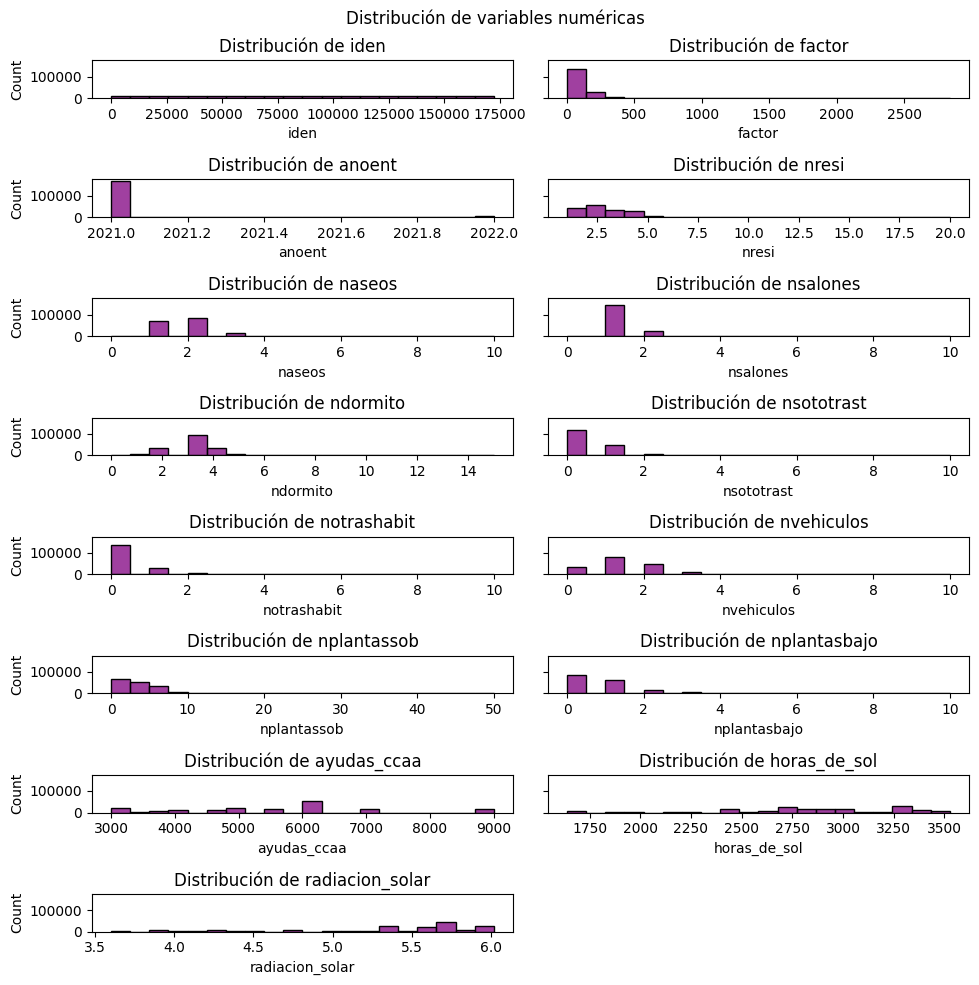

In [115]:
visualizador=f.Visualizador(df_ef)
visualizador.plot_numericas(color="purple", tamano_grafica=(10, 10))

No ploteo la relación ni las categóricas porque al haber tantas variables, solo veré las que me interesen según vayan surgiendo